# 導入葡萄酒數據集(只考慮前兩個特徵)

In [1]:
from sklearn.datasets import load_wine
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
wine = load_wine()
#選取前兩個特徵
X = wine.data[:, :2]
y = wine.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [3]:
sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=1, stratify=y)

# 訓練「線性核函數」模型

In [4]:
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [5]:
svmlin = SVC(kernel='linear', C=1.0, random_state=1)
svmlin.fit(X_train, y_train)
y_train_pred = svmlin.predict(X_train)
y_test_pred = svmlin.predict(X_test)

In [6]:
svmlin_train = accuracy_score(y_train, y_train_pred)
svmlin_test = accuracy_score(y_test, y_test_pred)

print('SVM with linear kernal train/test accuracies %.3f/%.3f' 
      %(svmlin_train, svmlin_test))

SVM with linear kernal train/test accuracies 0.806/0.741


In [7]:
#畫出散佈圖及決策邊界
#chose colors
from matplotlib.colors import ListedColormap

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

(-2.432983049556716, 3.9670169504432895)

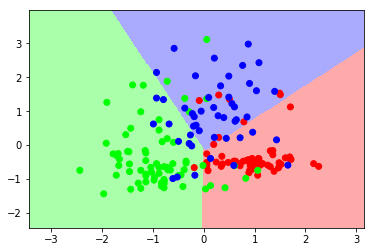

In [8]:
#分別用資料兩個特徵當Ｘ, y軸
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), 
                     np.arange(y_min, y_max, .02))

Z = svmlin.predict(np.c_[xx.ravel(), yy.ravel()])
#依據顏色分類
Z = Z.reshape(xx.shape)
#畫出散佈圖
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X_std[:,0], X_std[:,1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# 訓練「⾼斯核函數」模型

In [9]:
svmrbf = SVC(kernel='rbf', gamma=0.7, C=1.0)
svmrbf.fit(X_train, y_train)
y_train_pred = svmrbf.predict(X_train)
y_test_pred = svmrbf.predict(X_test)

In [10]:
svmrbf_train = accuracy_score(y_train, y_train_pred)
svmrbf_test = accuracy_score(y_test, y_test_pred)

print('SVM with RBF kernal train/test accuracies %.3f/%.3f' 
      %(svmrbf_train, svmrbf_test))

SVM with RBF kernal train/test accuracies 0.855/0.815


In [11]:
#畫出散佈圖及決策邊界
#choose colors
from matplotlib.colors import ListedColormap

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

(-2.432983049556716, 3.9670169504432895)

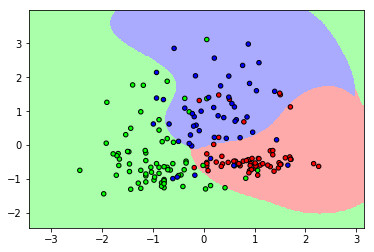

In [12]:
#分別用資料兩個特徵當Ｘ, y軸
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), 
                             np.arange(y_min, y_max, .02))

Z = svmrbf.predict(np.c_[xx.ravel(), yy.ravel()])

#依據顏色分類
Z = Z.reshape(xx.shape)
#畫出散佈圖
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X_std[:,0], X_std[:,1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# ⾼斯核函數參數的影響

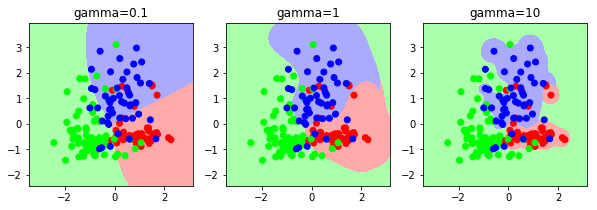

In [13]:
C=1.0
models = (SVC(kernel='rbf', gamma=0.1, C=C), 
              SVC(kernel='rbf', gamma=1, C=C), 
              SVC(kernel='rbf', gamma=10, C=C))
models = (clf.fit(X_train, y_train) for clf in models)

svmrbf_train = accuracy_score(y_train, y_train_pred)
svmrbf_test = accuracy_score(y_test, y_test_pred)

titles = ('gamma=0.1', 'gamma=1', 'gamma=10')

fig, sub = plt.subplots(1, 3, figsize=(10,3))

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), 
                             np.arange(y_min, y_max, .02))

for clf, title, ax in zip(models, titles, sub.flatten()):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.pcolormesh(xx, yy, Z, cmap=cmap_light)
    ax.scatter(X_std[:,0], X_std[:,1], c=y, cmap=cmap_bold)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(title)

In [14]:
svmrbf = SVC(kernel='rbf', gamma=0.1, C=1.0)
svmrbf.fit(X_train, y_train)
y_train_pred = svmrbf.predict(X_train)
y_test_pred = svmrbf.predict(X_test)

svmrbf_train = accuracy_score(y_train, y_train_pred)
svmrbf_test = accuracy_score(y_test, y_test_pred)

print('SVM with RBF kernal train/test accuracies %.3f/%.3f' 
      %(svmrbf_train, svmrbf_test))

SVM with RBF kernal train/test accuracies 0.815/0.759


In [15]:
svmrbf = SVC(kernel='rbf', gamma=1, C=1.0)
svmrbf.fit(X_train, y_train)
y_train_pred = svmrbf.predict(X_train)
y_test_pred = svmrbf.predict(X_test)

svmrbf_train = accuracy_score(y_train, y_train_pred)
svmrbf_test = accuracy_score(y_test, y_test_pred)

print('SVM with RBF kernal train/test accuracies %.3f/%.3f' 
      %(svmrbf_train, svmrbf_test))

SVM with RBF kernal train/test accuracies 0.855/0.815


In [16]:
svmrbf = SVC(kernel='rbf', gamma=10, C=1.0)
svmrbf.fit(X_train, y_train)
y_train_pred = svmrbf.predict(X_train)
y_test_pred = svmrbf.predict(X_test)

svmrbf_train = accuracy_score(y_train, y_train_pred)
svmrbf_test = accuracy_score(y_test, y_test_pred)

print('SVM with RBF kernal train/test accuracies %.3f/%.3f' 
      %(svmrbf_train, svmrbf_test))

SVM with RBF kernal train/test accuracies 0.887/0.833
